In [1]:
from _utils import *

# Load dataset from file
folder_path = '/mnt/home/tudomlumleart/ceph/10_ToniaDataset/ToniaDataset_withPolys.mat'

dataset = scipy.io.loadmat(folder_path)

# Hox locus dataset
nHox = 72
ctcfNtPolysHox = dataset['ctcfNtPolysHox']
ctcfPolysHox = dataset['ctcfPolysHox']
ntPolysHox = dataset['ntPolysHox']
radNtPolysHox = dataset['radNtPolysHox']
radPolysHox = dataset['radPolysHox']

# Sox locus dataset
nSox = 93
ctcfNtPolysSox = dataset['ctcfNtPolysSox']
ctcfPolysSox = dataset['ctcfPolysSox']
ntPolysSox = dataset['ntPolysSox']
radNtPolysSox = dataset['radNtPolysSox']
radPolysSox = dataset['radPolysSox']


2024-10-02 13:54:15.689273: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 13:54:15.733562: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [3]:
# Calculate the NaN fractions in each sample 
ctcfNtNanFracHox = np.isnan(ctcfNtPolysHox)[:, 0, :].mean(axis=0)
ctcfNanFracHox = np.isnan(ctcfPolysHox)[:, 0, :].mean(axis=0)
ntNanFracHox = np.isnan(ntPolysHox)[:, 0, :].mean(axis=0)
radNtNanFracHox = np.isnan(radNtPolysHox)[:, 0, :].mean(axis=0)
radNanFracHox = np.isnan(radPolysHox)[:, 0, :].mean(axis=0)

ctcfNtGoodIndicesHox = np.where(ctcfNtNanFracHox < 0.4)[0]
ctcfGoodIndicesHox = np.where(ctcfNanFracHox < 0.4)[0]
ntGoodIndicesHox = np.where(ntNanFracHox < 0.4)[0]
radNtGoodIndicesHox = np.where(radNtNanFracHox < 0.4)[0]
radGoodIndicesHox = np.where(radNanFracHox < 0.4)[0]

ctcfNtPolysHox = ctcfNtPolysHox[:, :, ctcfNtGoodIndicesHox]
ctcfPolysHox = ctcfPolysHox[:, :, ctcfGoodIndicesHox]
ntPolysHox = ntPolysHox[:, :, ntGoodIndicesHox]
radNtPolysHox = radNtPolysHox[:, :, radNtGoodIndicesHox]
radPolysHox = radPolysHox[:, :, radGoodIndicesHox]


In [4]:

# Interpolate polymers to fill in the NaN values 
ctcfNtPolysHox = interpolate_polymers(ctcfNtPolysHox)
ctcfPolysHox = interpolate_polymers(ctcfPolysHox)
ntPolysHox = interpolate_polymers(ntPolysHox)
radNtPolysHox = interpolate_polymers(radNtPolysHox)
radPolysHox = interpolate_polymers(radPolysHox)

ctcfNtPolysSox = interpolate_polymers(ctcfNtPolysSox)
ctcfPolysSox = interpolate_polymers(ctcfPolysSox)
ntPolysSox = interpolate_polymers(ntPolysSox)
radNtPolysSox = interpolate_polymers(radNtPolysSox)
radPolysSox = interpolate_polymers(radPolysSox)


def calculate_distance_map(polys):
    # Extract the dimensions of the input array
    num_probes, num_coords, num_cells = polys.shape
    
    # Initialize an array of the same shape to hold the interpolated values
    new_maps = np.zeros((num_cells, num_probes, num_probes))
    
    # Iterate over each cell
    for c in range(num_cells):
        # Extract the data for the current cell
        curr_cells = polys[:, :, c]
        
        # Skip cells with all missing values
        if np.all(np.isnan(curr_cells)):
            continue  # This leaves a matrix of zeros in the output array
        
        # Calculate the pairwise Euclidean distance between each pair of probes
        dmap = squareform(pdist(curr_cells))
        
        # Assign the distance map to the corresponding position in the output array
        new_maps[c, :, :] = dmap
    
    # Return the array with interpolated values
    return new_maps

# Generate distance maps from interpolated polymers
ctcfNtMapsHox = calculate_distance_map(ctcfNtPolysHox)
ctcfMapsHox = calculate_distance_map(ctcfPolysHox)
ntMapsHox = calculate_distance_map(ntPolysHox)
radNtMapsHox = calculate_distance_map(radNtPolysHox)
radMapsHox = calculate_distance_map(radPolysHox)

ctcfNtMapsSox = calculate_distance_map(ctcfNtPolysSox)
ctcfMapsSox = calculate_distance_map(ctcfPolysSox)
ntMapsSox = calculate_distance_map(ntPolysSox)
radNtMapsSox = calculate_distance_map(radNtPolysSox)
radMapsSox = calculate_distance_map(radPolysSox)

# Plot the median maps of these distance maps 
# To check if the distance maps are reasonable
ctcfNtMapsHox_median = np.nanmedian(ctcfNtMapsHox, axis=0)
ctcfMapsHox_median = np.nanmedian(ctcfMapsHox, axis=0)
ntMapsHox_median = np.nanmedian(ntMapsHox, axis=0)
radNtMapsHox_median = np.nanmedian(radNtMapsHox, axis=0)
radMapsHox_median = np.nanmedian(radMapsHox, axis=0)

ctcfNtMapsSox_median = np.nanmedian(ctcfNtMapsSox, axis=0)
ctcfMapsSox_median = np.nanmedian(ctcfMapsSox, axis=0)
ntMapsSox_median = np.nanmedian(ntMapsSox, axis=0)
radNtMapsSox_median = np.nanmedian(radNtMapsSox, axis=0)
radMapsSox_median = np.nanmedian(radMapsSox, axis=0)

# Generate flatten maps from distance maps
ctcfNtFlattenHox = np.array([x.flatten() for x in ctcfNtMapsHox])
ctcfFlattenHox = np.array([x.flatten() for x in ctcfMapsHox])
ntFlattenHox = np.array([x.flatten() for x in ntMapsHox])
radNtFlattenHox = np.array([x.flatten() for x in radNtMapsHox])
radFlattenHox = np.array([x.flatten() for x in radMapsHox])

ctcfNtFlattenSox = np.array([x.flatten() for x in ctcfNtMapsSox])
ctcfFlattenSox = np.array([x.flatten() for x in ctcfMapsSox])
ntFlattenSox = np.array([x.flatten() for x in ntMapsSox])
radNtFlattenSox = np.array([x.flatten() for x in radNtMapsSox])
radFlattenSox = np.array([x.flatten() for x in radMapsSox])

allFlattenHox = np.concatenate((ctcfFlattenHox, ntFlattenHox, radFlattenHox), axis=0)
allFlattenSox = np.concatenate((ctcfFlattenSox, ntFlattenSox, radFlattenSox), axis=0)

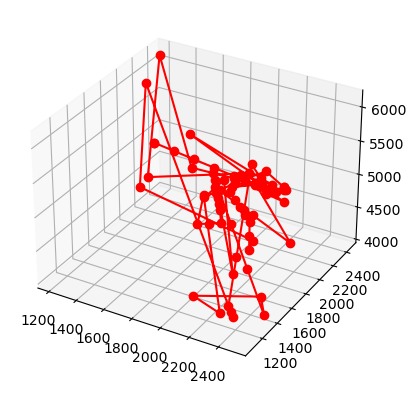

In [7]:
# Plot 3D scatter plot of the polymers
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(ntPolysHox[:, 0, 6], ntPolysHox[:, 1, 6], ntPolysHox[:, 2, 6], c='r', marker='o')

In [75]:
def visualize_polymer(polymer_chain: ArrayLike, save_path: str = '') -> None:
    """Plot a polymer chain in 3D space and optionally save the figure 
    
    Monomers are colored by the distance from one end of the polymer. 
    
    Parameters
    ----------
    polymer_chain : numpy.ndarray
                    an `num_monomers-by-3` ArrayLike of monomer coordinates 
    save_path : str, optional
                path to save the figure
                
    """
    # Extract each coordinate of this polymer chain 
    x = polymer_chain[:, 0]
    y = polymer_chain[:, 1]
    z = polymer_chain[:, 2]
    
    # Intepolate path between monomer to show connectivity within the polymer
    # Parameterize by the monomer number
    t = np.arange(0, polymer_chain.shape[0])
    
    # Create a cubic spline interpolation for each dimension
    cs_x = CubicSpline(t, x)
    cs_y = CubicSpline(t, y)
    cs_z = CubicSpline(t, z)
    
    # Normalize the monomer number 
    num_monomers = polymer_chain.shape[0] 
    norm_monomer_number = np.arange(0, num_monomers) / num_monomers
    monomer_colors = cm.rainbow(norm_monomer_number)

    # Generate fine samples for a smooth curve
    t_fine = np.linspace(t[0], t[-1], 500)
    x_fine = cs_x(t_fine)
    y_fine = cs_y(t_fine)
    z_fine = cs_z(t_fine)

    # Create a new matplotlib figure and an axes instance (the 3d part)
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot using scatter
    ax.plot(x_fine, y_fine, z_fine, 'gray', label='Interpolated Path')
    for i in range(num_monomers):
        ax.scatter(x[i], y[i], z[i], color=monomer_colors[i], s=50, alpha=0.75) 

    # Labeling the axes (optional but recommended for clarity)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    # Create a ScalarMappable with the same colormap and normalization as the scatter
    # norm = plt.Normalize(0, num_monomers)
    # sm = cm.ScalarMappable(cmap='rainbow', norm=norm)
    # sm.set_array([]) 
    
    # Add colorbar
    # cbar = plt.colorbar(sm, ax=ax, location='bottom', shrink=0.4)
    # cbar.set_label('Monomer number')
    
    ax.view_init(elev=30, azim=45)
    ax.grid(False)
    # Remove the axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    

    # ax.legend()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

In [80]:
save_dir = '/mnt/home/tudomlumleart/ceph/01_ChromatinEnsembleRefinement/chromatin-ensemble-refinement/figures/20241002_CIG'

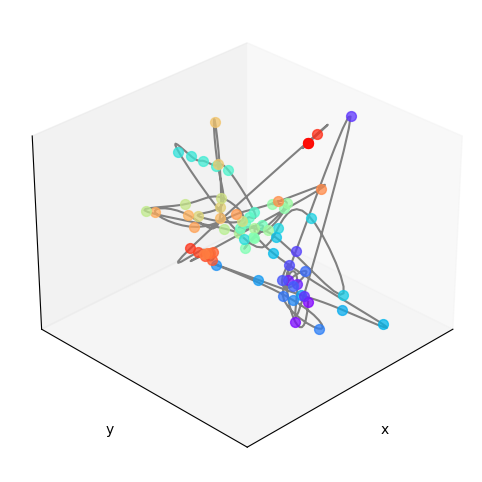

In [81]:
visualize_polymer(ntPolysHox[:, :, 63], os.path.join(save_dir, 'ntPolysHox_63.png'))

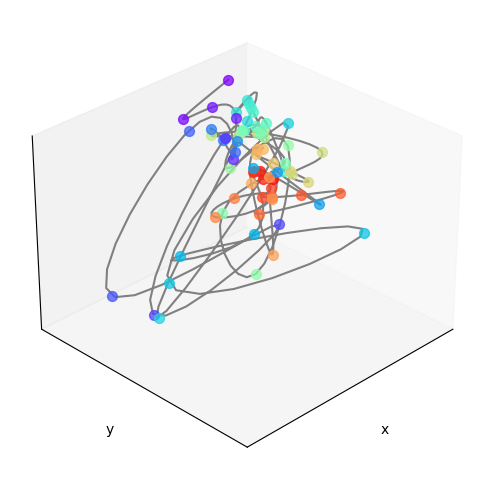

In [82]:
visualize_polymer(ntPolysHox[:, :, 74], os.path.join(save_dir, 'ntPolysHox_74.png'))

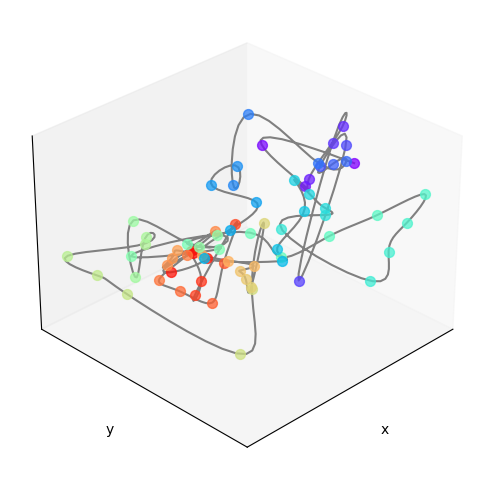

In [83]:
visualize_polymer(ntPolysHox[:, :, 81], os.path.join(save_dir, 'ntPolysHox_81.png'))

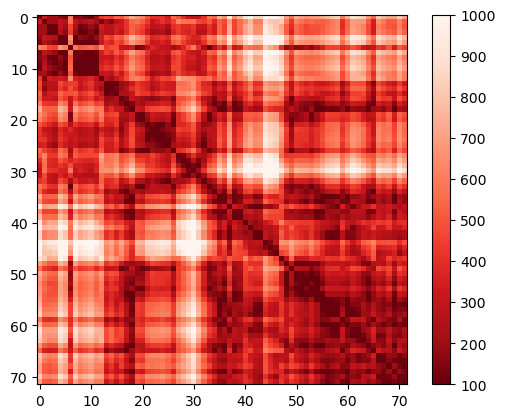

In [94]:
plt.imshow(ntMapsHox[81], cmap='Reds_r', vmin=100, vmax=1000)
plt.colorbar()
cbar.set_label('Euclidean distance (nm)', rotation=270, labelpad=15)
plt.savefig(os.path.join(save_dir, 'ntMapsHox_81.png'), dpi=300, bbox_inches='tight')

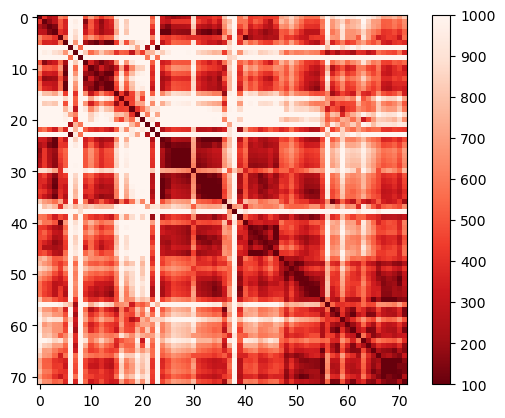

In [95]:
plt.imshow(ntMapsHox[74], cmap='Reds_r', vmin=100, vmax=1000)
plt.colorbar()
cbar.set_label('Euclidean distance (nm)', rotation=270, labelpad=15)
plt.savefig(os.path.join(save_dir, 'ntMapsHox_74.png'), dpi=300, bbox_inches='tight')

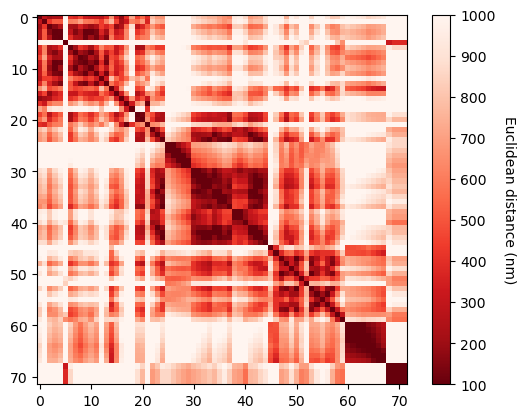

In [96]:
plt.imshow(ntMapsHox[63], cmap='Reds_r', vmin=100, vmax=1000)
cbar = plt.colorbar()
cbar.set_label('Euclidean distance (nm)', rotation=270, labelpad=15)
plt.savefig(os.path.join(save_dir, 'ntMapsHox_63.png'), dpi=300, bbox_inches='tight')

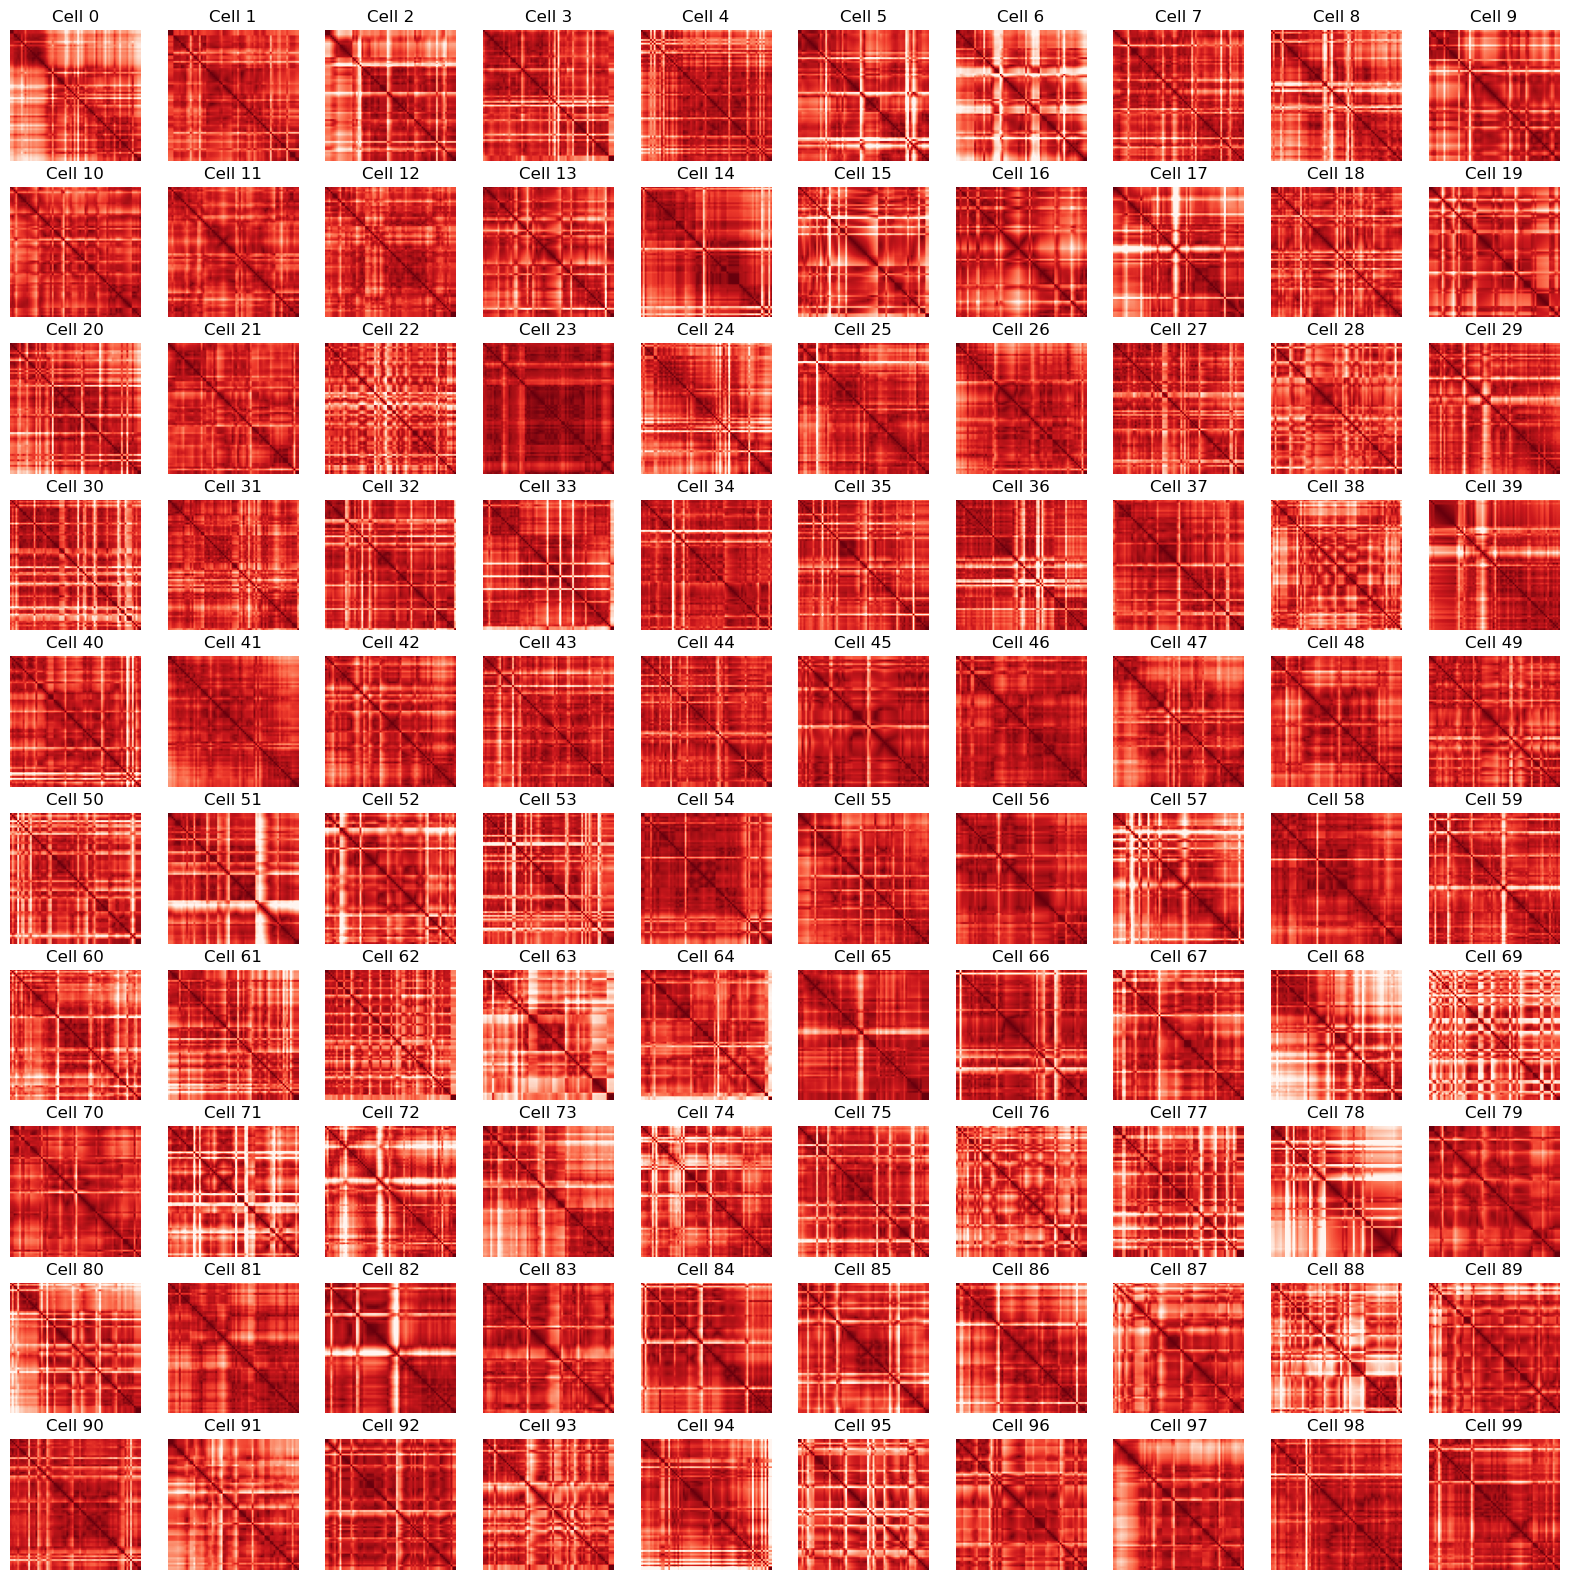

In [67]:
# Plot the first 100 distance maps
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(100):
    ax[i // 10, i % 10].imshow(ntMapsHox[i], cmap='Reds_r', vmax=1500)
    ax[i // 10, i % 10].axis('off')
    ax[i // 10, i % 10].set_title(f'Cell {i}')